<a href="https://colab.research.google.com/github/Silver272/Micro-credential-pg/blob/main/Titanic_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem


The aim for this analysis is to project the classification of survived vs. not survived in the Titanic.






# Task 2: Load the libraries





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import plotly
import cufflinks as cf

cf.go_offline()

# Task 3: Load the Data

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Silver272/ML-Data/main/titanic_train.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
dtype: int64

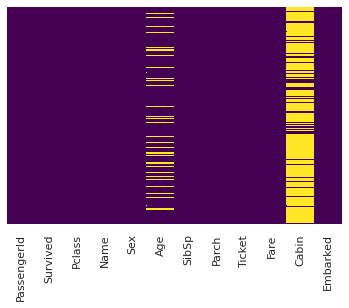

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

As we can see,rooughly 20% of the age data is missing. Therefore, the proportion of Age missing is likely small enough for reasonable replacement with some form of inputation. If we look at the Cabin column,we can see that we are missing too much of data to do anything useful at this basic level...

DATA CLEANING

In [ ]:
def inpute_age(cols):
  #defining a function to do
  Age = cols[0]

  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:

      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)

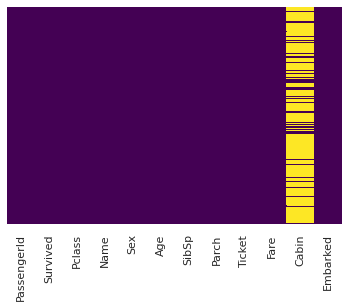

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to directly take in those features as inputs!!

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

DATA WRANGLING

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(['Embarked'], drop_first=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


# Task 5: Data Visualization

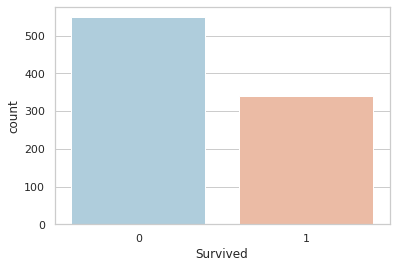

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

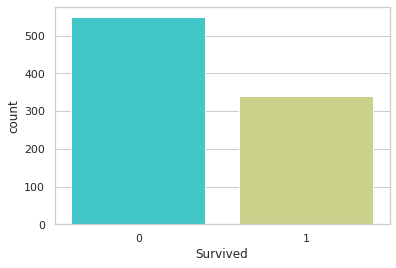

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='rainbow')

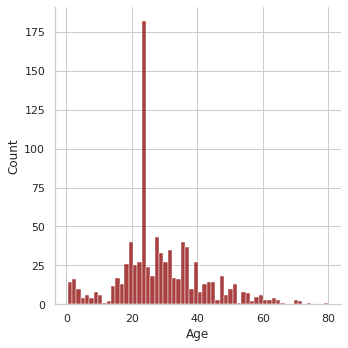

In [ ]:
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=60)

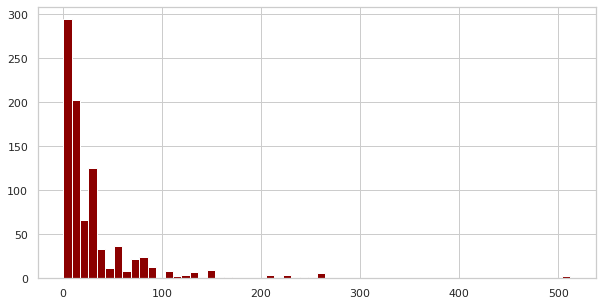

In [ ]:
train['Fare'].hist(color='darkred', bins=60, figsize=(10,5))

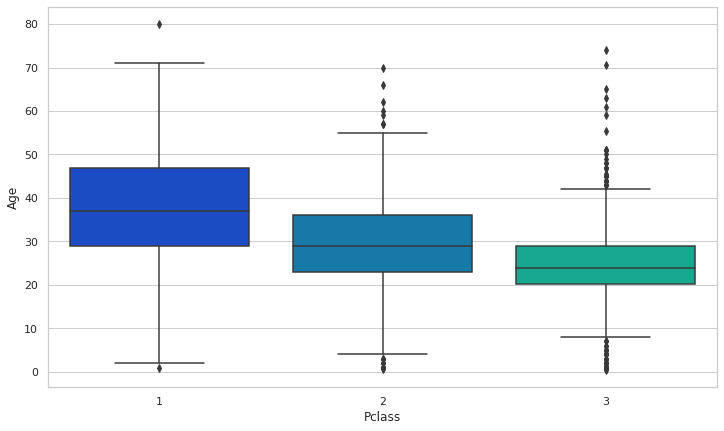

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

Since we can determine that people in higher classes tend to be older we can then use these to average age values and input according to Pclass for age.

# Task 6:Compute the Cost Function

In [ ]:
# This analysis does not require it

# Task 7: Compute the Gradient Decent

In [ ]:
# This analysis does not require it

# Task 8: Perform Train, Test Split 

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

# Task 9: Conduct the Logistic Regression on the Data




In [ ]:
# TRAINING AND PREDICTING

# Import the adequate model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model by assigning a variable the class pertaining to the model selected

In [ ]:
logmodel = LogisticRegression()

#Train the Model created by using the fit method

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

# Evaluate the model

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



#Task 10: Making Predictions

In [ ]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print('Survived: ', sum(pp!=0))
print('Not Survived: ', sum(pp==0))

0.8277153558052435
Survived:  86
Not Survived:  181
